In [26]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [28]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [29]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [30]:
tf.keras.backend.clear_session()

In [31]:
subject = 'Tocantins - Consumo de Cimento (t)'
start_index = 0
split_index = 203
window_size = 36
train_split = split_index + 1 - 12

In [32]:
data = pd.read_csv('2003_mo_model_input_TO.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data =data.drop([' NFSP - Fluxo Mensal (Milhões de reais)'], axis=1)
data

,Unnamed: 0,Tocantins- custo m2 (R$),Tocantins - Desemprego,Tocantins - IDH Educacao,Tocantins - IDH Longevidade,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),...,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Tocantins - IDH,Tocantins - Consumo de Cimento (t)
0,2003-1,11275.335200,8.243830,0.674633,0.766370,3.576410,978.531801,1343.371397,26.858971,18.470168,...,3.656420,0.969649,0.724032,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.700107,17.555
1,2003-2,11378.766738,8.237931,0.675135,0.766735,3.573972,978.532153,1343.394931,26.860534,18.468827,...,3.654697,0.950783,0.690297,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.700487,14.976
2,2003-3,11476.693775,8.232033,0.675638,0.767100,3.572551,978.532357,1343.408659,26.861445,18.468045,...,3.654266,0.938332,0.669681,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.700866,13.334
3,2003-4,11568.023775,8.226135,0.676140,0.767465,3.572398,978.532379,1343.410130,26.861543,18.467962,...,3.653595,0.926401,0.660494,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.701246,15.173
4,2003-5,11656.641017,8.220236,0.676642,0.767830,3.576238,978.439851,1339.493279,26.838338,18.686479,...,3.650266,0.951683,0.648337,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.701626,18.728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,36946.428021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2023-6,36910.472628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2023-7,36863.430304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2023-8,36780.869880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


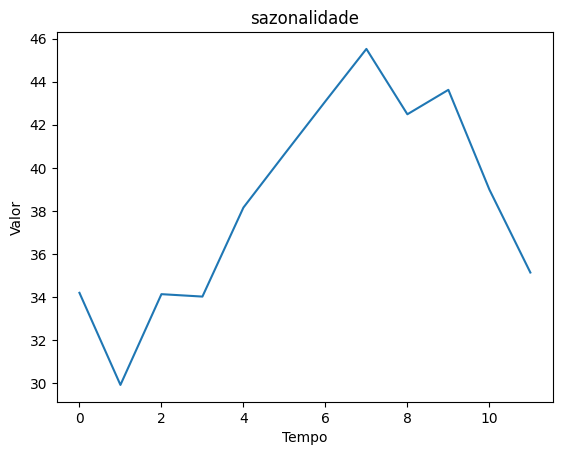

,sazonalidade
sazonalidade,
0,34.200978
1,29.927494
2,34.138788
3,34.026833
4,38.156890
5,40.633822
6,43.089368
7,45.518635
8,42.486270


In [33]:
def calculate_monthly_means(consume_of_cement, subject):
    df = pd.DataFrame({subject: consume_of_cement[:train_split]})
    df['sazonalidade'] = df.index % 12
    monthly_means = df.groupby('sazonalidade')[subject].mean()
    result_df = pd.DataFrame({'sazonalidade': monthly_means})

    return result_df

media_df = calculate_monthly_means(data[subject], subject)
plot_columns(media_df)
media_df

In [34]:
def fill_original_df_with_monthly_means(df_og, media_df):
    monthly_means = media_df['sazonalidade'].tolist()
    df_og['sazonalidade'] = [monthly_means[i % 12] for i in range(len(df_og))]
    return df_og

data = fill_original_df_with_monthly_means(data, media_df)
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data

,Unnamed: 0,Tocantins- custo m2 (R$),Tocantins - Desemprego,Tocantins - IDH Educacao,Tocantins - IDH Longevidade,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),...,INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Tocantins - IDH,sazonalidade,Tocantins - Consumo de Cimento (t)
0,2003-1,11275.335200,8.243830,0.674633,0.766370,3.576410,978.531801,1343.371397,26.858971,18.470168,...,0.969649,0.724032,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.700107,34.200978,17.555
1,2003-2,11378.766738,8.237931,0.675135,0.766735,3.573972,978.532153,1343.394931,26.860534,18.468827,...,0.950783,0.690297,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.700487,29.927494,14.976
2,2003-3,11476.693775,8.232033,0.675638,0.767100,3.572551,978.532357,1343.408659,26.861445,18.468045,...,0.938332,0.669681,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.700866,34.138788,13.334
3,2003-4,11568.023775,8.226135,0.676140,0.767465,3.572398,978.532379,1343.410130,26.861543,18.467962,...,0.926401,0.660494,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.701246,34.026833,15.173
4,2003-5,11656.641017,8.220236,0.676642,0.767830,3.576238,978.439851,1339.493279,26.838338,18.686479,...,0.951683,0.648337,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.701626,38.156890,18.728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,36946.428021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.156890,NaN
245,2023-6,36910.472628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.633822,NaN
246,2023-7,36863.430304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.089368,NaN
247,2023-8,36780.869880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.518635,NaN


In [35]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data

0      29.644
1      25.375
2      25.608
3      30.043
4      28.702
        ...  
244       NaN
245       NaN
246       NaN
247       NaN
248       NaN
Name: Tocantins - Consumo de Cimento (t), Length: 249, dtype: float64

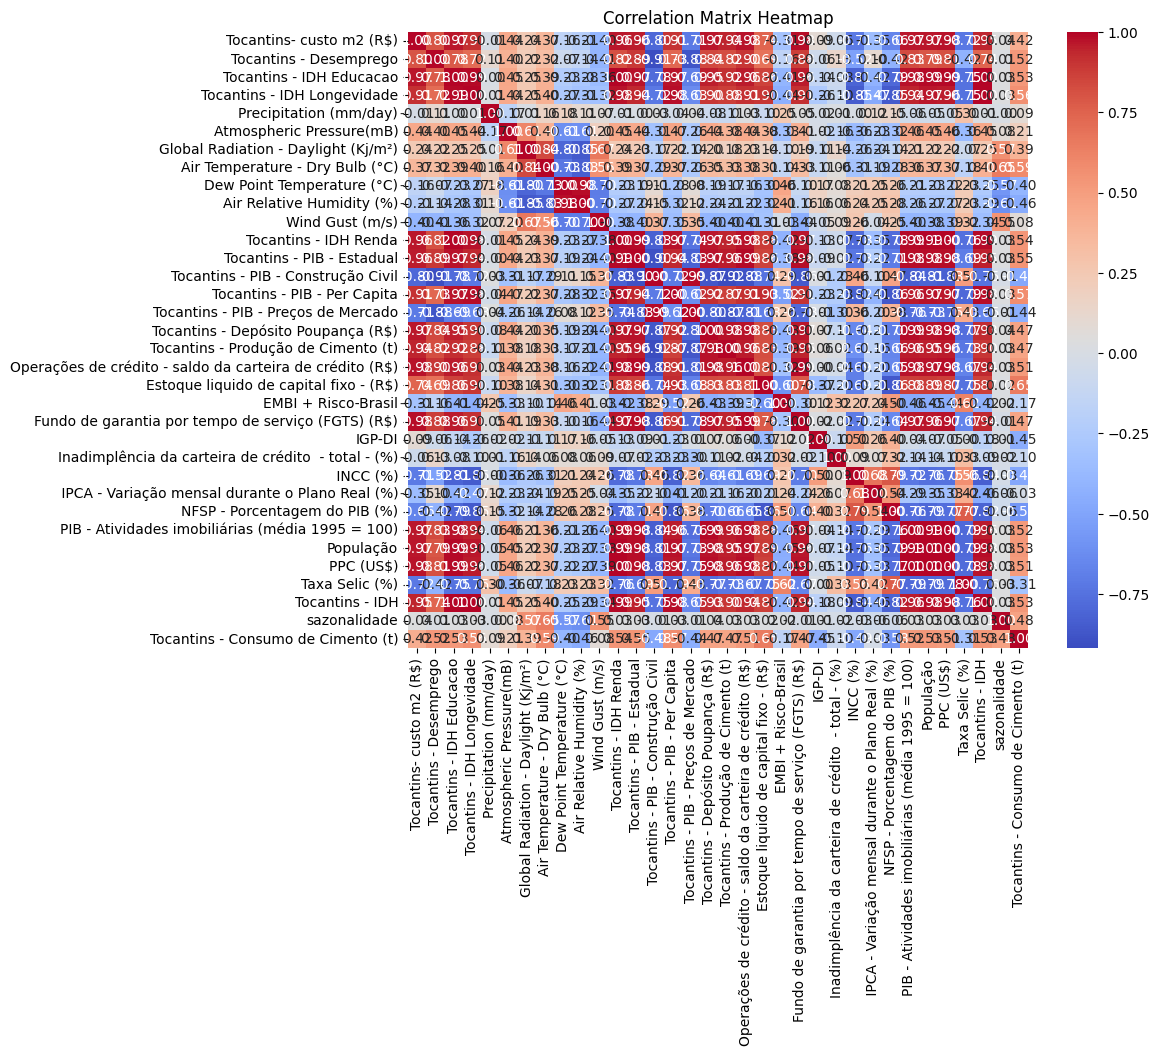

In [36]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

safe_data = data.iloc[:split_index + 1,1:-1]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

def remove_high_vif_columns(dataframe, threshold=1000):
    i=0
    while True:
        vif_result = calculate_vif(dataframe)
        high_vif_column = vif_result.loc[vif_result["VIF"].idxmax()]["Feature"]
        
        if vif_result["VIF"].max() <= threshold:
            print(f"Num columns removed: {i}")
            return dataframe
        i += 1
        dataframe = dataframe.drop(high_vif_column, axis=1)

In [38]:
safe_data = data.iloc[:split_index + 1,1:-1]
vif_info = calculate_vif(safe_data)
vif_info

,Feature,VIF
0,Tocantins- custo m2 (R$),7.474767e+05
1,Tocantins - Desemprego,3.793826e+04
2,Tocantins - IDH Educacao,1.263389e+09
3,Tocantins - IDH Longevidade,1.689538e+09
4,Precipitation (mm/day),6.695068e+01
5,Atmospheric Pressure(mB),2.245304e+07
6,Global Radiation - Daylight (Kj/m²),4.430673e+03
7,Air Temperature - Dry Bulb (°C),1.076442e+05
8,Dew Point Temperature (°C),3.917408e+04
9,Air Relative Humidity (%),4.303776e+04


In [39]:
data = remove_high_vif_columns(safe_data, 10000000)
data

Num columns removed: 5


,Tocantins- custo m2 (R$),Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),...,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%),sazonalidade
0,11275.335200,8.243830,0.674633,3.576410,978.531801,1343.371397,26.858971,18.470168,64.274735,1.922279,...,2.097001e+06,1.036534,3.656420,0.969649,0.724032,11.520143,126.459809,169.247665,1.611498,34.200978
1,11378.766738,8.237931,0.675135,3.573972,978.532153,1343.394931,26.860534,18.468827,64.266609,1.922184,...,2.000523e+06,0.993449,3.654697,0.950783,0.690297,11.189862,126.581813,170.176810,1.450389,29.927494
2,11476.693775,8.232033,0.675638,3.572551,978.532357,1343.408659,26.861445,18.468045,64.261870,1.922064,...,1.963278e+06,0.973020,3.654266,0.938332,0.669681,10.820792,126.703818,171.135713,1.870184,34.138788
3,11568.023775,8.226135,0.676140,3.572398,978.532379,1343.410130,26.861543,18.467962,64.261362,1.921914,...,1.954187e+06,0.940489,3.653595,0.926401,0.660494,10.417840,126.825822,172.116904,1.355287,34.026833
4,11656.641017,8.220236,0.676642,3.576238,978.439851,1339.493279,26.838338,18.686479,65.145668,1.897554,...,1.975493e+06,0.917493,3.650266,0.951683,0.648337,9.959690,126.976217,173.072271,1.585538,38.156890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,27860.230875,9.474063,0.728495,2.512060,979.294214,1446.870175,28.372719,16.575592,54.389562,1.696832,...,1.038665e+07,1.139835,3.035443,0.628071,0.411247,1.836884,207.092470,437.906135,0.516394,45.518635
200,28057.357250,9.453549,0.728361,2.544445,978.747582,1388.170332,28.577807,17.924795,57.545640,1.586895,...,1.036684e+07,1.152658,3.032326,0.635009,0.433581,1.814025,207.285636,438.554287,0.509923,42.486270
201,28259.969954,9.433035,0.728228,2.991130,978.568236,1330.967973,27.980869,19.482428,64.193630,1.477518,...,1.094126e+07,1.188899,3.007554,0.648424,0.461431,1.810325,207.478801,439.156241,0.467083,43.620391
202,28477.091915,9.412521,0.728095,3.089042,978.555348,1317.624535,27.838579,20.198689,67.012968,1.416038,...,1.165215e+07,1.180399,2.995976,0.663946,0.480964,1.810689,207.781676,439.704663,0.441494,38.994783


In [40]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data

,Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Tocantins - PIB - Estadual,...,EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%)
0,-0.788548,-2.109054,0.488145,-0.152934,-0.093198,-0.461545,-0.080723,0.021728,1.110539,-1.701687,...,-0.581961,-1.384242,2.574314,1.320402,3.184489,2.782450,4.506880,-1.894583,-1.851489,2.125141
1,-0.794786,-2.078323,0.485400,-0.152469,-0.092903,-0.459685,-0.081358,0.020823,1.110198,-1.685907,...,-0.804750,-1.415865,2.334870,1.314693,3.029073,2.407943,4.328460,-1.889555,-1.840236,1.610904
2,-0.801024,-2.047592,0.483799,-0.152198,-0.092731,-0.458600,-0.081728,0.020295,1.109772,-1.670127,...,-0.619149,-1.428073,2.221334,1.313266,2.926505,2.179073,4.129086,-1.884527,-1.828623,2.950828
3,-0.807261,-2.016861,0.483627,-0.152169,-0.092712,-0.458484,-0.081768,0.020238,1.109240,-1.654347,...,-0.126522,-1.431053,2.040542,1.311046,2.828220,2.077086,3.911409,-1.879499,-1.816740,1.307354
4,-0.813499,-1.986129,0.487952,-0.274523,-0.141874,-0.486104,0.021756,0.118767,1.022769,-1.638567,...,0.525280,-1.424070,1.912744,1.300019,3.036493,1.942128,3.663912,-1.873302,-1.805169,2.042281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.512465,1.186130,-0.710725,0.855227,1.205851,1.340279,-0.978291,-1.079669,0.310249,1.009987,...,-0.334258,1.332879,3.148408,-0.736097,0.370628,-0.689886,-0.724085,1.428371,1.402207,-1.370268
200,0.490771,1.177985,-0.674247,0.132399,0.469089,1.584398,-0.339097,-0.728022,-0.080004,0.994015,...,-0.327663,1.326386,3.219670,-0.746418,0.427775,-0.441954,-0.736434,1.436331,1.410056,-1.390925
201,0.469076,1.169841,-0.171107,-0.104755,-0.248878,0.873857,0.398842,0.012692,-0.468271,0.978043,...,-0.303635,1.514665,3.421082,-0.828457,0.538287,-0.132782,-0.738433,1.444292,1.417346,-1.527663
202,0.447382,1.161696,-0.060820,-0.121797,-0.416356,0.704488,0.738176,0.326820,-0.686512,0.962071,...,-0.275803,1.747673,3.373840,-0.866800,0.666156,0.084061,-0.738236,1.456774,1.423988,-1.609340


In [41]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Tocantins - PIB - Estadual,...,EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%)
0,-0.788548,-2.109054,0.488145,-0.152934,-0.093198,-0.461545,-0.080723,0.021728,1.110539,-1.701687,...,-0.581961,-1.384242,2.574314,1.320402,3.184489,2.782450,4.506880,-1.894583,-1.851489,2.125141
1,-0.794786,-2.078323,0.485400,-0.152469,-0.092903,-0.459685,-0.081358,0.020823,1.110198,-1.685907,...,-0.804750,-1.415865,2.334870,1.314693,3.029073,2.407943,4.328460,-1.889555,-1.840236,1.610904
2,-0.801024,-2.047592,0.483799,-0.152198,-0.092731,-0.458600,-0.081728,0.020295,1.109772,-1.670127,...,-0.619149,-1.428073,2.221334,1.313266,2.926505,2.179073,4.129086,-1.884527,-1.828623,2.950828
3,-0.807261,-2.016861,0.483627,-0.152169,-0.092712,-0.458484,-0.081768,0.020238,1.109240,-1.654347,...,-0.126522,-1.431053,2.040542,1.311046,2.828220,2.077086,3.911409,-1.879499,-1.816740,1.307354
4,-0.813499,-1.986129,0.487952,-0.274523,-0.141874,-0.486104,0.021756,0.118767,1.022769,-1.638567,...,0.525280,-1.424070,1.912744,1.300019,3.036493,1.942128,3.663912,-1.873302,-1.805169,2.042281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.727586,1.267730,-0.525980,0.400149,0.922646,0.999501,-0.708012,-0.830682,-0.601723,1.149605,...,-0.234432,1.098595,0.237913,-0.637894,-1.790206,-1.972576,-0.537386,1.267871,1.279826,-1.152820
188,0.714934,1.262813,0.256996,-0.041413,0.169095,0.610875,-0.209213,-0.348719,-1.000217,1.144042,...,-0.187714,1.076314,0.559735,-0.723145,-1.629944,-1.832285,-0.553461,1.288480,1.291262,-1.253503
189,0.702282,1.257896,0.426330,0.056762,-0.513571,-0.062284,0.379082,0.296060,-1.219211,1.138479,...,-0.161779,1.263463,0.802696,-0.863773,-1.383366,-1.767518,-0.577640,1.309088,1.301919,-1.425444
190,0.689630,1.252979,0.407616,0.123492,-0.905214,-0.455380,0.649738,0.643013,-1.282193,1.132916,...,-0.157728,1.498990,1.106124,-0.975183,-1.227161,-1.688436,-0.606406,1.322965,1.311660,-1.237935


In [42]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      29.644
1      25.375
2      25.608
3      30.043
4      28.702
        ...  
187    59.316
188    51.459
189    54.833
190    44.566
191    40.537
Name: Tocantins - Consumo de Cimento (t), Length: 192, dtype: float64

In [43]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [44]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(156, 36, 26)

In [45]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Tocantins - PIB - Estadual,...,EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%)
156,1.483996,1.257968,6.262731,0.086709,0.706367,0.524187,0.906255,0.650012,-0.177275,1.133339,...,0.893819,1.318837,-0.878779,0.613775,-0.843949,0.077835,-0.555830,0.827975,0.911463,0.407265
157,1.440085,1.261058,1.589642,0.250646,0.792363,1.185617,0.822518,0.277894,-0.722507,1.138715,...,1.005776,1.195627,-1.051645,0.807648,-0.905729,-0.168265,-0.572666,0.830073,0.922870,0.137084
158,1.396174,1.264149,1.433097,0.910212,0.363871,0.857943,0.711079,0.274351,-0.731331,1.144092,...,1.076752,1.159056,-1.098564,1.037275,-0.974248,-0.389950,-0.585674,0.832171,0.935360,0.296087
159,1.352262,1.267240,1.034941,1.341006,0.976838,1.061522,-0.021351,-0.366951,-0.304800,1.149469,...,1.085553,1.111178,-1.062721,1.108728,-1.053570,-0.479719,-0.596842,0.834269,0.948135,0.197300
160,1.308351,1.270331,0.013329,1.769991,1.479719,1.500510,-0.781067,-1.047762,0.169406,1.154845,...,1.062918,1.101433,-0.935050,1.109333,-1.130350,-0.570527,-0.605761,0.833606,0.961143,0.469403
161,1.264440,1.273422,0.338165,1.815144,1.587883,1.753053,-1.214223,-1.404304,0.682590,1.160222,...,1.000960,1.094619,-0.911738,1.064134,-1.002475,-0.507950,-0.615263,0.832943,0.973478,0.775434
162,1.220529,1.276513,-0.047347,1.177773,1.950589,2.063342,-1.384729,-1.604202,0.767951,1.165599,...,0.914197,1.070145,-1.067437,1.167813,-1.242922,-0.557480,-0.618938,0.832280,0.985778,0.136553
163,1.176618,1.279603,-0.036649,0.393723,1.565214,2.139005,-1.024738,-1.346839,0.404678,1.170975,...,0.810555,1.060594,-0.970725,1.364965,-1.322806,-0.742853,-0.619453,0.840249,0.999021,0.642038
164,1.132706,1.282694,-0.204826,-0.167974,1.066355,1.646195,-0.423596,-0.771368,-0.086342,1.176352,...,0.652883,1.041994,-0.841670,1.531106,-1.355523,-0.787367,-0.611176,0.848219,1.012408,0.482412
165,1.088795,1.285785,0.386537,-0.586273,0.553636,0.945077,0.087920,-0.184771,-0.661499,1.181729,...,0.494053,1.195016,-0.838453,1.617011,-1.376175,-0.757940,-0.599627,0.856189,1.025524,0.367764


In [46]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 26)

In [47]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [48]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(144, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.14,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [49]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [50]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[298775035, 693512627, 2474872881, 2239221102, 1106904715, 1017280821, 352727388, 1873947638, 3482848691, 2162581469]


Step: 0 ___________________________________________
val_loss: 37.92888259887695
winner_seed: 298775035


Step: 1 ___________________________________________
val_loss: 41.78287124633789


Step: 2 ___________________________________________
val_loss: 36.1489143371582
winner_seed: 2474872881


Step: 3 ___________________________________________
val_loss: 33.761070251464844
winner_seed: 2239221102


Step: 4 ___________________________________________
val_loss: 30.700437545776367
winner_seed: 1106904715


Step: 5 ___________________________________________
val_loss: 31.408533096313477


Step: 6 ___________________________________________
val_loss: 31.618675231933594


Step: 7 ___________________________________________
val_loss: 33.9780158996582


Step: 8 ___________________________________________
val_loss: 38.781978607177734


Step: 9 ____________________________________

In [51]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)

Epoch 1/10000
5/5 [==============================] - 2s 93ms/step - loss: 1288.9175 - val_loss: 100.8847
Epoch 2/10000
5/5 [==============================] - 0s 7ms/step - loss: 58.0814 - val_loss: 204.5408
Epoch 3/10000
5/5 [==============================] - 0s 7ms/step - loss: 74.6534 - val_loss: 101.1639
Epoch 4/10000
5/5 [==============================] - 0s 8ms/step - loss: 55.5966 - val_loss: 107.0308
Epoch 5/10000
5/5 [==============================] - 0s 8ms/step - loss: 59.1816 - val_loss: 109.5769
Epoch 6/10000
5/5 [==============================] - 0s 8ms/step - loss: 49.5449 - val_loss: 89.8985
Epoch 7/10000
5/5 [==============================] - 0s 9ms/step - loss: 52.0065 - val_loss: 77.8366
Epoch 8/10000
5/5 [==============================] - 0s 9ms/step - loss: 40.8538 - val_loss: 73.3701
Epoch 9/10000
5/5 [==============================] - 0s 9ms/step - loss: 47.1911 - val_loss: 80.3899
Epoch 10/10000
5/5 [==============================] - 0s 8ms/step - loss: 38.0258 -

5/5 [==============================] - 0s 8ms/step - loss: 11.5843 - val_loss: 35.4502
Epoch 82/10000
5/5 [==============================] - 0s 7ms/step - loss: 12.9191 - val_loss: 36.5172
Epoch 83/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.6120 - val_loss: 31.2808
Epoch 84/10000
5/5 [==============================] - 0s 7ms/step - loss: 11.4993 - val_loss: 33.9476
Epoch 85/10000
5/5 [==============================] - 0s 8ms/step - loss: 12.7867 - val_loss: 36.4280
Epoch 86/10000
5/5 [==============================] - 0s 8ms/step - loss: 12.4763 - val_loss: 34.4055
Epoch 87/10000
5/5 [==============================] - 0s 8ms/step - loss: 12.1752 - val_loss: 46.1317
Epoch 88/10000
5/5 [==============================] - 0s 9ms/step - loss: 10.9331 - val_loss: 58.2471
Epoch 89/10000
5/5 [==============================] - 0s 8ms/step - loss: 13.9627 - val_loss: 38.7261
Epoch 90/10000
5/5 [==============================] - 0s 8ms/step - loss: 11.5354 - val_loss: 48.5

Epoch 161/10000
5/5 [==============================] - 0s 8ms/step - loss: 10.6863 - val_loss: 49.0368
Epoch 162/10000
5/5 [==============================] - 0s 9ms/step - loss: 10.5197 - val_loss: 39.5155
Epoch 163/10000
5/5 [==============================] - 0s 7ms/step - loss: 10.7481 - val_loss: 43.4651
Epoch 164/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.2420 - val_loss: 39.7365
Epoch 165/10000
5/5 [==============================] - 0s 8ms/step - loss: 10.3216 - val_loss: 36.9692
Epoch 166/10000
5/5 [==============================] - 0s 8ms/step - loss: 9.7583 - val_loss: 39.6934
Epoch 167/10000
5/5 [==============================] - 0s 8ms/step - loss: 9.3122 - val_loss: 35.4367
Epoch 168/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.9745 - val_loss: 56.7579
Epoch 169/10000
5/5 [==============================] - 0s 8ms/step - loss: 14.8971 - val_loss: 34.9781
Epoch 170/10000
5/5 [==============================] - 0s 8ms/step - loss: 11

Epoch 241/10000
5/5 [==============================] - 0s 8ms/step - loss: 9.2549 - val_loss: 37.7121
Epoch 242/10000
5/5 [==============================] - 0s 9ms/step - loss: 11.7412 - val_loss: 33.4396
Epoch 243/10000
5/5 [==============================] - 0s 9ms/step - loss: 10.2898 - val_loss: 37.6080
Epoch 244/10000
5/5 [==============================] - 0s 9ms/step - loss: 9.8707 - val_loss: 34.4899
Epoch 245/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.5863 - val_loss: 41.7168
Epoch 246/10000
5/5 [==============================] - 0s 9ms/step - loss: 8.9131 - val_loss: 36.7331
Epoch 247/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.6808 - val_loss: 49.7472
Epoch 248/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.7920 - val_loss: 43.0339
Epoch 249/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.9815 - val_loss: 38.3571
Epoch 250/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.949

5/5 [==============================] - 0s 8ms/step - loss: 8.6767 - val_loss: 40.6284
Epoch 322/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.6088 - val_loss: 39.2151
Epoch 323/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.5594 - val_loss: 39.2127
Epoch 324/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.0232 - val_loss: 45.4423
Epoch 325/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.2505 - val_loss: 38.1599
Epoch 326/10000
5/5 [==============================] - 0s 8ms/step - loss: 9.2614 - val_loss: 38.0158
Epoch 327/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.3345 - val_loss: 34.9055
Epoch 328/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.7178 - val_loss: 57.1410
Epoch 329/10000
5/5 [==============================] - 0s 9ms/step - loss: 9.7529 - val_loss: 42.7243
Epoch 330/10000
5/5 [==============================] - 0s 9ms/step - loss: 9.0022 - val_loss: 36.7

5/5 [==============================] - 0s 8ms/step - loss: 9.9981 - val_loss: 35.5462
Epoch 402/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.4944 - val_loss: 35.5491
Epoch 403/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.7973 - val_loss: 41.1849
Epoch 404/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.2229 - val_loss: 38.0264
Epoch 405/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.8647 - val_loss: 37.9942
Epoch 406/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.2720 - val_loss: 38.1836
Epoch 407/10000
5/5 [==============================] - 0s 7ms/step - loss: 7.6455 - val_loss: 40.0201
Epoch 408/10000
5/5 [==============================] - 0s 7ms/step - loss: 7.3268 - val_loss: 34.6086
Epoch 409/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.0691 - val_loss: 34.4170
Epoch 410/10000
5/5 [==============================] - 0s 8ms/step - loss: 9.3851 - val_loss: 31.8

5/5 [==============================] - 0s 7ms/step - loss: 7.8541 - val_loss: 39.7308
Epoch 482/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.2597 - val_loss: 36.6633
Epoch 483/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2473 - val_loss: 39.9692
Epoch 484/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7907 - val_loss: 38.1966
Epoch 485/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8576 - val_loss: 36.9496
Epoch 486/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2754 - val_loss: 46.5476
Epoch 487/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6313 - val_loss: 36.8840
Epoch 488/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.6439 - val_loss: 36.3772
Epoch 489/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.0850 - val_loss: 38.5391
Epoch 490/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.5717 - val_loss: 39.6

5/5 [==============================] - 0s 8ms/step - loss: 8.0461 - val_loss: 37.1372
Epoch 562/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.3247 - val_loss: 36.0636
Epoch 563/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.6403 - val_loss: 45.9736
Epoch 564/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.4752 - val_loss: 39.4193
Epoch 565/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.1070 - val_loss: 36.9204
Epoch 566/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.2672 - val_loss: 36.8256
Epoch 567/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.4288 - val_loss: 35.7249
Epoch 568/10000
5/5 [==============================] - 0s 7ms/step - loss: 7.6155 - val_loss: 41.4610
Epoch 569/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.3808 - val_loss: 54.3922
Epoch 570/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.0015 - val_loss: 36.4

5/5 [==============================] - 0s 8ms/step - loss: 6.5958 - val_loss: 47.5363
Epoch 642/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.7393 - val_loss: 41.0314
Epoch 643/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.6966 - val_loss: 35.8182
Epoch 644/10000
5/5 [==============================] - 0s 8ms/step - loss: 8.1534 - val_loss: 40.2584
Epoch 645/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.3990 - val_loss: 36.2702
Epoch 646/10000
5/5 [==============================] - 0s 9ms/step - loss: 7.5604 - val_loss: 38.3583
Epoch 647/10000
5/5 [==============================] - 0s 9ms/step - loss: 6.5731 - val_loss: 36.1041
Epoch 648/10000
5/5 [==============================] - 0s 9ms/step - loss: 7.9217 - val_loss: 39.2433
Epoch 649/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.4345 - val_loss: 44.6792
Epoch 650/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.9152 - val_loss: 38.8

5/5 [==============================] - 0s 8ms/step - loss: 6.4997 - val_loss: 39.9928
Epoch 722/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.5001 - val_loss: 43.3058
Epoch 723/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.4504 - val_loss: 46.9377
Epoch 724/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.6537 - val_loss: 41.1212
Epoch 725/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.4368 - val_loss: 37.6303
Epoch 726/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.0401 - val_loss: 38.0201
Epoch 727/10000
5/5 [==============================] - 0s 9ms/step - loss: 6.2340 - val_loss: 36.3996
Epoch 728/10000
5/5 [==============================] - 0s 9ms/step - loss: 6.6036 - val_loss: 38.5457
Epoch 729/10000
5/5 [==============================] - 0s 9ms/step - loss: 7.1079 - val_loss: 41.9736
Epoch 730/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.0797 - val_loss: 39.8

5/5 [==============================] - 0s 8ms/step - loss: 7.1556 - val_loss: 45.9183
Epoch 802/10000
5/5 [==============================] - 0s 9ms/step - loss: 6.7979 - val_loss: 40.5926
Epoch 803/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.6955 - val_loss: 46.0679
Epoch 804/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.2373 - val_loss: 52.7185
Epoch 805/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.5913 - val_loss: 40.6811
Epoch 806/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.9436 - val_loss: 38.1026
Epoch 807/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.7256 - val_loss: 37.0844
Epoch 808/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.6945 - val_loss: 49.1614
Epoch 809/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.2950 - val_loss: 45.3384
Epoch 810/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.8458 - val_loss: 44.2

5/5 [==============================] - 0s 8ms/step - loss: 6.5535 - val_loss: 45.6913
Epoch 882/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.6372 - val_loss: 34.9482
Epoch 883/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.1243 - val_loss: 38.4949
Epoch 884/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.7942 - val_loss: 42.3130
Epoch 885/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.6459 - val_loss: 39.8956
Epoch 886/10000
5/5 [==============================] - 0s 9ms/step - loss: 6.4277 - val_loss: 48.5372
Epoch 887/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.0205 - val_loss: 39.7627
Epoch 888/10000
5/5 [==============================] - 0s 7ms/step - loss: 5.8986 - val_loss: 58.4633
Epoch 889/10000
5/5 [==============================] - 0s 8ms/step - loss: 7.8560 - val_loss: 50.4778
Epoch 890/10000
5/5 [==============================] - 0s 7ms/step - loss: 6.5235 - val_loss: 45.9

5/5 [==============================] - 0s 8ms/step - loss: 5.8394 - val_loss: 37.6027
Epoch 962/10000
5/5 [==============================] - 0s 8ms/step - loss: 5.7516 - val_loss: 42.1497
Epoch 963/10000
5/5 [==============================] - 0s 8ms/step - loss: 5.4263 - val_loss: 53.6301
Epoch 964/10000
5/5 [==============================] - 0s 10ms/step - loss: 5.7100 - val_loss: 47.7423
Epoch 965/10000
5/5 [==============================] - 0s 9ms/step - loss: 6.3398 - val_loss: 44.0618
Epoch 966/10000
5/5 [==============================] - 0s 10ms/step - loss: 5.9672 - val_loss: 60.1571
Epoch 967/10000
5/5 [==============================] - 0s 9ms/step - loss: 7.4434 - val_loss: 48.7625
Epoch 968/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.3102 - val_loss: 48.8495
Epoch 969/10000
5/5 [==============================] - 0s 8ms/step - loss: 6.3010 - val_loss: 43.1933
Epoch 970/10000
5/5 [==============================] - 0s 9ms/step - loss: 5.4575 - val_loss: 38

In [52]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [53]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 14ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,34.317703,34.83007,36.723984,39.077614,40.988831,42.323166,43.649147,45.302277,46.945541,48.272316,47.740074,45.343292
Target,41.574,37.004,38.102,41.248,47.265,49.398,55.541,52.757,50.016,48.899,42.345,37.881
Error,7.256298,2.173931,1.378017,2.170387,6.276169,7.074833,11.891853,7.454723,3.070457,0.626682,5.395073,7.462292


In [54]:
display(mae)
display(mape)

5.185893

0.11267489

In [55]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [56]:
errors, mae, mape = year_mae_mape_calculator(trained_model,
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 14ms/step
Ano-11: |Prediction[[505.514]] - Target[542.03]| =  Error: [[36.51602]]; MAPE:[[0.067369]]


[array([[36.51602]], dtype=float32)]

36.51602

0.067369